In [1]:
!pip install geopandas

     ---------------------------------------- 1.1/1.1 MB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 949.8 kB/s eta 0:00:00
     ---------------------------------------- 22.0/22.0 MB 1.2 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 1.5 MB/s eta 0:00:00


In [213]:
#Importando las librerías.

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

#### 1. Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021

In [5]:
data = pd.read_csv('../../_data/data_dengue_peru.csv')
data
#data['ubigeo'] = data['Ubigeo'].astype(str)

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6972\1987828356.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../../_data/data_dengue_peru.csv')


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0
...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN


#### 2. Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [8]:
#Convertimos la data en un string de 6 caracteres
data['ubigeo'] = data['Ubigeo'].astype(str)

In [10]:
data.loc[data['ubigeo'].str.len() == 5, 'ubigeo'] = '0' + data['ubigeo']
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914
...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303


In [11]:
#Generamos el ubigeo de departamento y provincia
data['dep'] = data['ubigeo'].astype(str).str[:2]
data['prov'] = data['ubigeo'].astype(str).str[2:4]
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo,dep,prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,09
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,08,09
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,09
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03


#### 3. Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [222]:
#Nos quedamos con la data de 2021 y convertimos Casos a float

data_2021 = data[data['Año'] == 2021]
data_2021['Casos'] = data_2021['Casos'].astype(float)

data_2021

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6972\2400731316.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Casos'] = data_2021['Casos'].astype(float)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo,dep,prov
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
6,2021,41,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,150112,15,01
7,2021,41,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,150143,15,01
8,2021,41,Dengue,LIMA,ATE,LIMA,150103,NaN,150103,15,01
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03


In [13]:
#Colapsamos a nivel ubigeo
casos_dist_2021 = data_2021.groupby('ubigeo')['Casos'].sum()
casos_dist_2021

ubigeo
010101      0.0
010201    474.0
010202     25.0
010203     38.0
010204      8.0
          ...  
250302     26.0
250303     32.0
250304     14.0
250305      2.0
250401      0.0
Name: Casos, Length: 469, dtype: float64

In [61]:
#Leemos la data distrital
districts = gpd.read_file('../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')
districts = districts.rename(columns={'UBIGEO': 'ubigeo'})
districts

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322..."
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969..."
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851..."
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005..."
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8..."
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2..."
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1..."
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8..."


In [15]:
#Unimos la data
data_2021_mapa = districts.merge(casos_dist_2021, on='ubigeo' , how='outer')
data_2021_mapa

,CCDD,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,geometry,Casos
0,06,CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,06,CAJAMARCA,11,SAN MIGUEL,05,EL PRADO,EL PRADO,061105,0611,061105,15,EL PRADO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,06,CAJAMARCA,11,SAN MIGUEL,09,NIEPOS,NIEPOS,061109,0611,061109,41,NIEPOS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,06,CAJAMARCA,11,SAN MIGUEL,10,SAN GREGORIO,SAN GREGORIO,061110,0611,061110,48,SAN GREGORIO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,06,CAJAMARCA,12,SAN PABLO,03,SAN LUIS,SAN LUIS GRANDE,061203,0612,061203,9,SAN LUIS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1869,04,AREQUIPA,04,CASTILLA,04,CHACHAS,CHACHAS,040404,0404,040404,19,CHACHAS,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,04,AREQUIPA,04,CASTILLA,05,CHILCAYMARCA,CHILCAYMARCA,040405,0404,040405,24,CHILCAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,04,AREQUIPA,04,CASTILLA,06,CHOCO,CHOCO,040406,0404,040406,58,CHOCO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,04,AREQUIPA,04,CASTILLA,07,HUANCARQUI,HUANCARQUI,040407,0404,040407,25,HUANCARQUI,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


<AxesSubplot:>

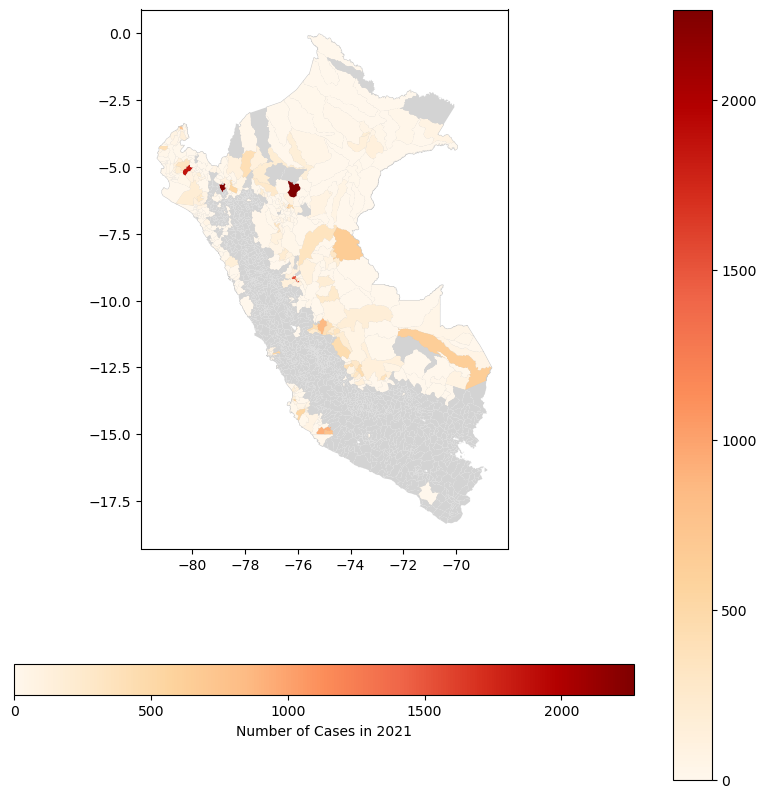

In [16]:
#Generamos el mapa

fig, ax = plt.subplots(figsize=(10, 10))

data_2021_mapa.plot(column='Casos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
data_2021_mapa.plot(column='Casos', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Number of Cases in 2021", 'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey', 'label': 'No Data'})


#### 4. Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [31]:
#El data frame "data_2021_mapa" contiene la data con la geometría a nivel de distrito. Con la función dissolve se agrega
#a nivel de provincia.

<AxesSubplot:>

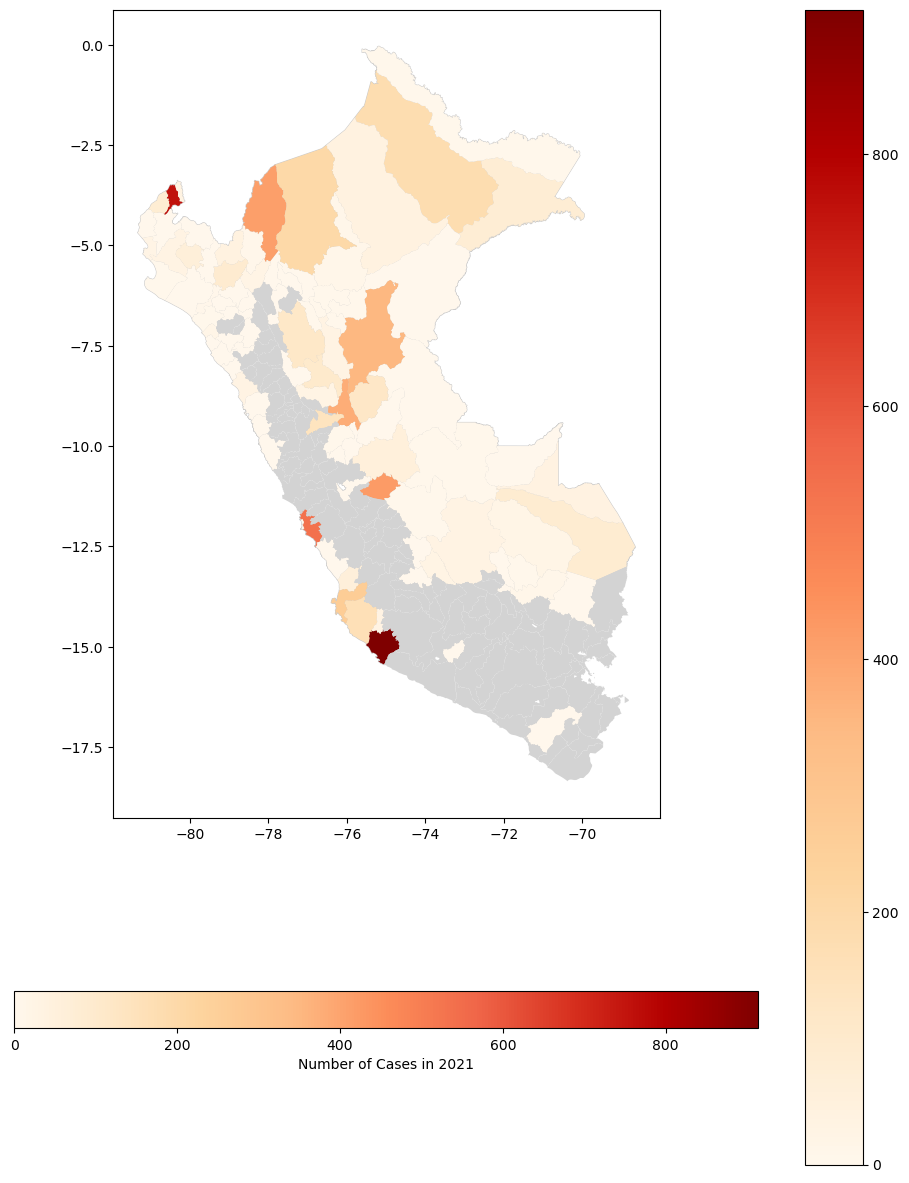

In [30]:
prov_shp = data_2021_mapa.dissolve( by = 'IDPROV' )

fig, ax = plt.subplots( figsize = ( 12, 15 ) )
prov_shp.plot( column='Casos', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True )
prov_shp.plot(column='Casos', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Number of Cases in 2021", 'orientation': "horizontal"}, missing_kwds={'color': 'lightgrey', 'label': 'No Data'})

#### 5. Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [88]:
data['Año'].unique()

array([2020, 2021, 2019, 2017, 2016, 2018, 2015], dtype=int64)

In [ ]:
#Generamos una nueva data (ya no segmentada para el 2021).

In [43]:
#Convertimos Casos a número.
data['Casos']=pd.to_numeric(data['Casos'], errors='coerce')
data

,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo,dep,prov
0,2020,43,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,09
1,2021,41,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
2,2021,42,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01
3,2020,1,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,0.0,080914,08,09
4,2020,53,Dengue,CUSCO,MEGANTONI,LA CONVENCION,80914,2.0,080914,08,09
...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172140,2021,49,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03
172141,2021,50,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02
172142,2021,50,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03


In [135]:
#Colapsamos a nivel departamento y año
casos_dist= data.groupby( ['Año','dep'], as_index = False )[['Casos']].sum()\
            .reset_index(drop=True)
casos_dist

,Año,dep,Casos
0,2015,01,37.0
1,2015,02,118.0
2,2015,05,268.0
3,2015,06,218.0
4,2015,07,0.0
...,...,...,...
142,2021,20,4010.0
143,2021,21,0.0
144,2021,22,3966.0
145,2021,24,1364.0


In [134]:
#Agregamos la data del INEI a nivel de dpto.
dpto_shp = districts.dissolve( by = 'CCDD' )
dpto_shp

,geometry,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO
CCDD,,,,,,,,,,,,,,,
01,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
02,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,03,ANTONIO RAYMONDI,01,LLAMELLIN,LLAMELLIN,020301,0203,020301,52,LLAMELLIN,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
03,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",APURIMAC,01,ABANCAY,08,SAN PEDRO DE CACHORA,CACHORA,030108,0301,030108,52,SAN PEDRO DE CACHORA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
04,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",AREQUIPA,06,CONDESUYOS,08,YANAQUIHUA,YANAQUIHUA,040608,0406,040608,53,YANAQUIHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
05,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1...",AYACUCHO,05,LA MAR,10,ANCHIHUAY,ANCHIHUAY,050510,0505,050510,28,ANCHIHUAY,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
06,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462...",CAJAMARCA,05,CONTUMAZA,04,GUZMANGO,GUZMANGO,060504,0605,060504,50,GUZMANGO,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
07,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0...",CALLAO,01,CALLAO,07,MI PERU,MI PERU,070107,0701,070107,1,MI PERU,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
08,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7...",CUSCO,01,CUSCO,08,WANCHAQ,WANCHAQ,080108,0801,080108,1,WANCHAQ,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com
09,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0...",HUANCAVELICA,07,TAYACAJA,20,ANDAYMARCA,ANDAYMARCA,090720,0907,090720,34,ANDAYMARCA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com


In [145]:
data_mapa = dpto_shp.merge(casos_dist, left_on ='CCDD', right_on = 'dep').reset_index(drop=True)
data_mapa

,geometry,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Año,dep,Casos
0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2015,01,37.0
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2016,01,90.0
2,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2017,01,93.0
3,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2018,01,109.0
4,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2019,01,164.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2017,25,779.0
143,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2018,25,317.0
144,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2019,25,214.0
145,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2020,25,10934.0


In [157]:
anio=data['Año'].unique().tolist()
anio.sort()
type(anio)

list

IndexError: list index out of range

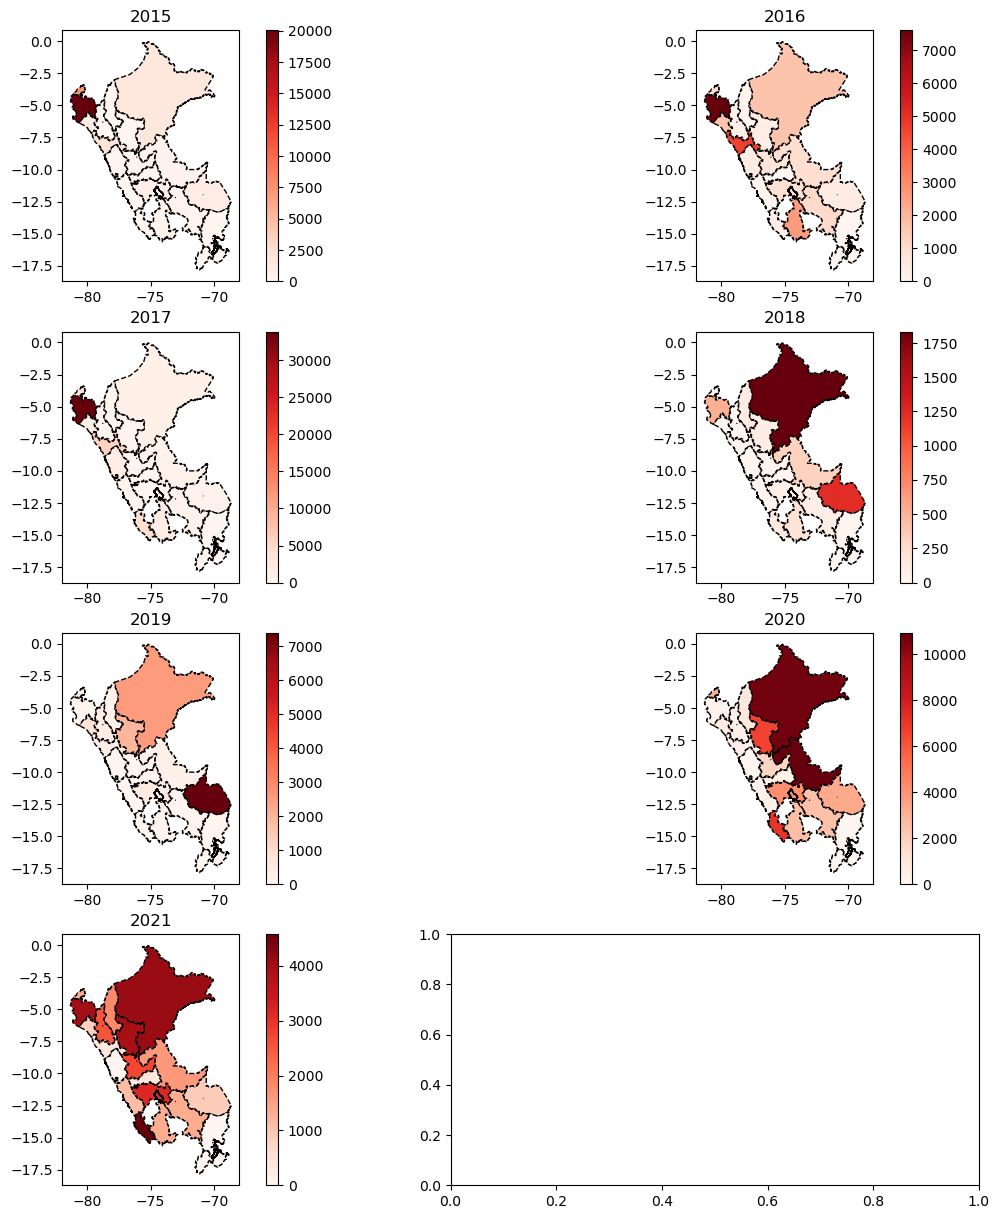

In [160]:
fig, axis = plt.subplots( nrows = 4, ncols= 2, figsize = ( 15, 15 ) )

idx = 0
for i in range(4):
    for j in range (2):
              
        ax = axis[ i ][ j ]  
        year=anio[ idx ]
        df6= data_mapa[data_mapa['Año']==year]
        df6.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( year )
        
        idx = idx + 1

#### 6. Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [223]:
data_2021['Semana'] = data_2021['Semana'].astype(float)

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6972\347443352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Semana'] = data_2021['Semana'].astype(float)


In [249]:
#Creamos la columna trimestre
        
def conditions(row):
    if row['Semana'] <= 13:
        val = 1
    elif row['Semana'] >=14 and row['Semana']<= 26:
        val = 2
    elif row['Semana'] >=27 and row['Semana']<=39:
        val = 3 
    elif row['Semana'] >=40:
        val = 4  
    else:
        val = 'NA'
    return val

#Apply the function to each data point in the data frame
data_2021['Trimestre']= data_2021.apply(conditions, axis=1)
data_2021

C:\Users\Laptop\AppData\Local\Temp\ipykernel_6972\2767067062.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2021['Trimestre']= data_2021.apply(conditions, axis=1)


,Año,Semana,Eventos o daños,Departamento,Distrito,Provincia,Ubigeo,Casos,ubigeo,dep,prov,Trimestre
1,2021,41.0,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01,4
2,2021,42.0,Dengue,MOQUEGUA,MOQUEGUA,MARISCAL NIETO,180101,NaN,180101,18,01,4
6,2021,41.0,Dengue,LIMA,INDEPENDENCIA,LIMA,150112,NaN,150112,15,01,4
7,2021,41.0,Dengue,LIMA,VILLA MARIA DEL TRIUNFO,LIMA,150143,NaN,150143,15,01,4
8,2021,41.0,Dengue,LIMA,ATE,LIMA,150103,NaN,150103,15,01,4
...,...,...,...,...,...,...,...,...,...,...,...,...
172139,2021,49.0,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02,4
172140,2021,49.0,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03,4
172141,2021,50.0,Dengue,MADRE DE DIOS,MADRE DE DIOS,MANU,170203,NaN,170203,17,02,4
172142,2021,50.0,Dengue,MADRE DE DIOS,TAHUAMANU,TAHUAMANU,170303,NaN,170303,17,03,4


In [250]:
#Colapsamos a nivel departamento y trimestres
casos_dist_2021= data_2021.groupby( ['Trimestre','dep'], as_index = False )[['Casos']].sum()\
            .reset_index(drop=True)
casos_dist_2021

,Trimestre,dep,Casos
0,1,01,599.0
1,1,02,3.0
2,1,05,812.0
3,1,06,594.0
4,1,07,1.0
...,...,...,...
79,4,20,89.0
80,4,21,0.0
81,4,22,55.0
82,4,24,14.0


In [251]:
#Combinamos la data a nivel de dpto...
data_mapa_2021 = dpto_shp.merge(casos_dist_2021, left_on ='CCDD', right_on = 'dep').reset_index(drop=True)
data_mapa_2021

,geometry,NOMBDEP,CCPP,NOMBPROV,CCDI,NOMBDIST,CAPITAL,ubigeo,IDPROV,CODIGO,CNT_CCPP,DESCRIPCIO,DESCARGAR,WHATSAPP,CONTACTO,Trimestre,dep,Casos
0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,1,01,599.0
1,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2,01,609.0
2,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,3,01,583.0
3,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741...",AMAZONAS,01,CHACHAPOYAS,06,CHUQUIBAMBA,CHUQUIBAMBA,010106,0101,010106,39,CHUQUIBAMBA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,4,01,39.0
4,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3...",ANCASH,03,ANTONIO RAYMONDI,01,LLAMELLIN,LLAMELLIN,020301,0203,020301,52,LLAMELLIN,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,1,02,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980...",TUMBES,01,TUMBES,01,TUMBES,TUMBES,240101,2401,240101,12,TUMBES,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,4,24,14.0
80,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,1,25,923.0
81,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,2,25,214.0
82,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904...",UCAYALI,02,ATALAYA,02,SEPAHUA,SEPAHUA,250202,2502,250202,48,SEPAHUA,www.geogpsperu.com,931381206,juan.suyo@geogpsperu.com,3,25,424.0


In [281]:
trim=data_mapa_2021['Trimestre'].unique().tolist()
trim.sort()
trim

[1, 2, 3, 4]

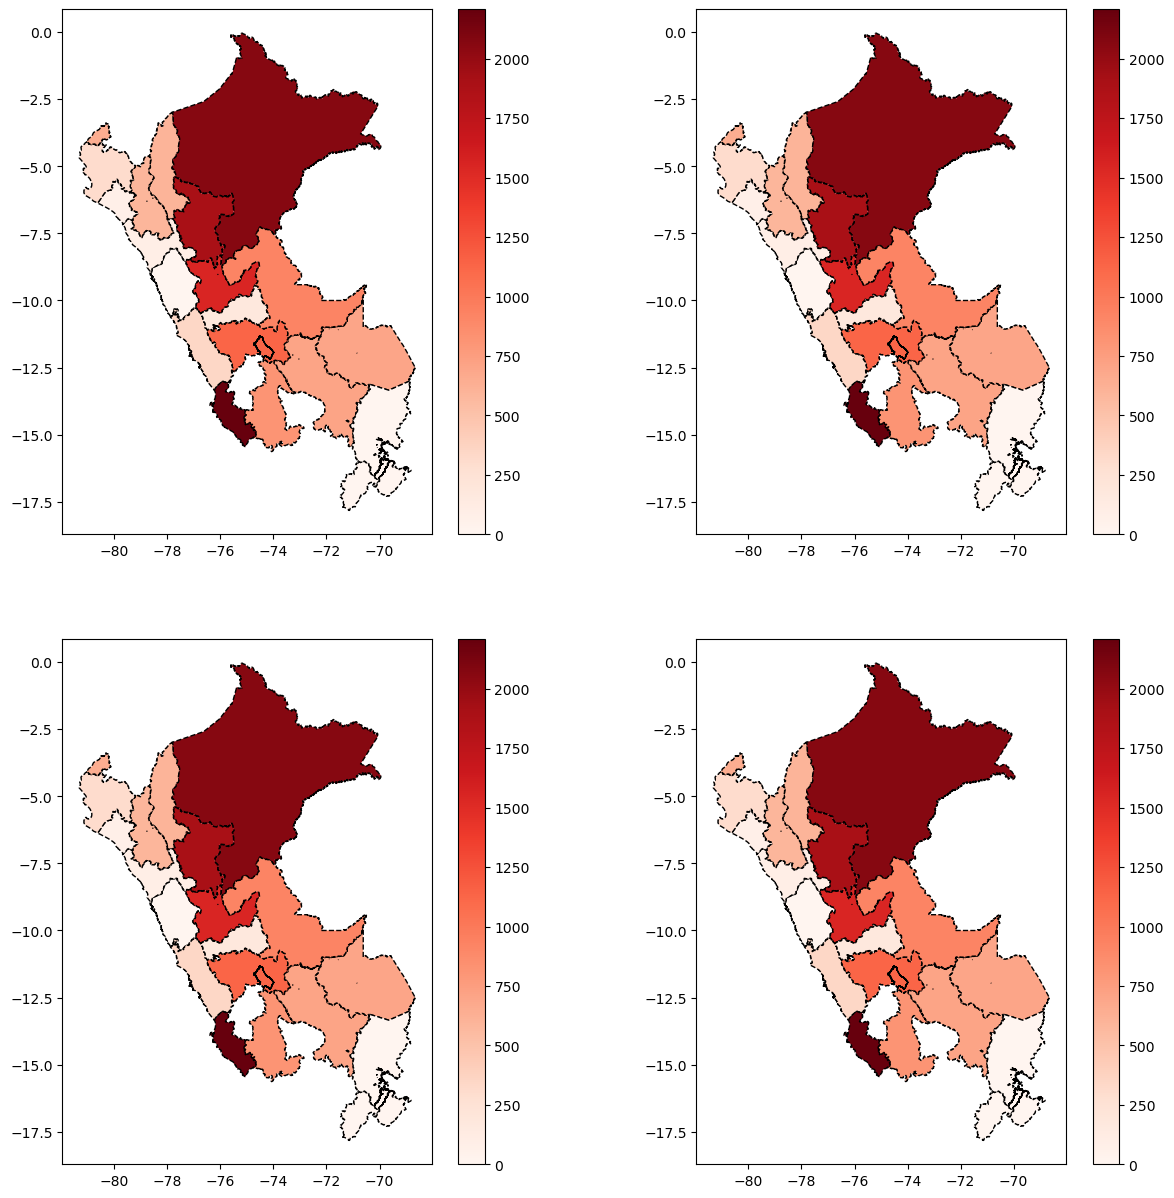

In [301]:
fig, axis = plt.subplots( nrows = 2, ncols= 2, figsize = ( 15, 15 ) )

idx = 0
for i in range(2):
    for j in range (2):
              
        ax = axis[ i ][ j ]  
        quar=trim[ idx ]
        df6= data_mapa_2021[data_mapa_2021['Trimestre']==quar]
        df6.plot( column='Casos', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax)

idx = idx + 1

TypeError: __init__() got an unexpected keyword argument 'loc'

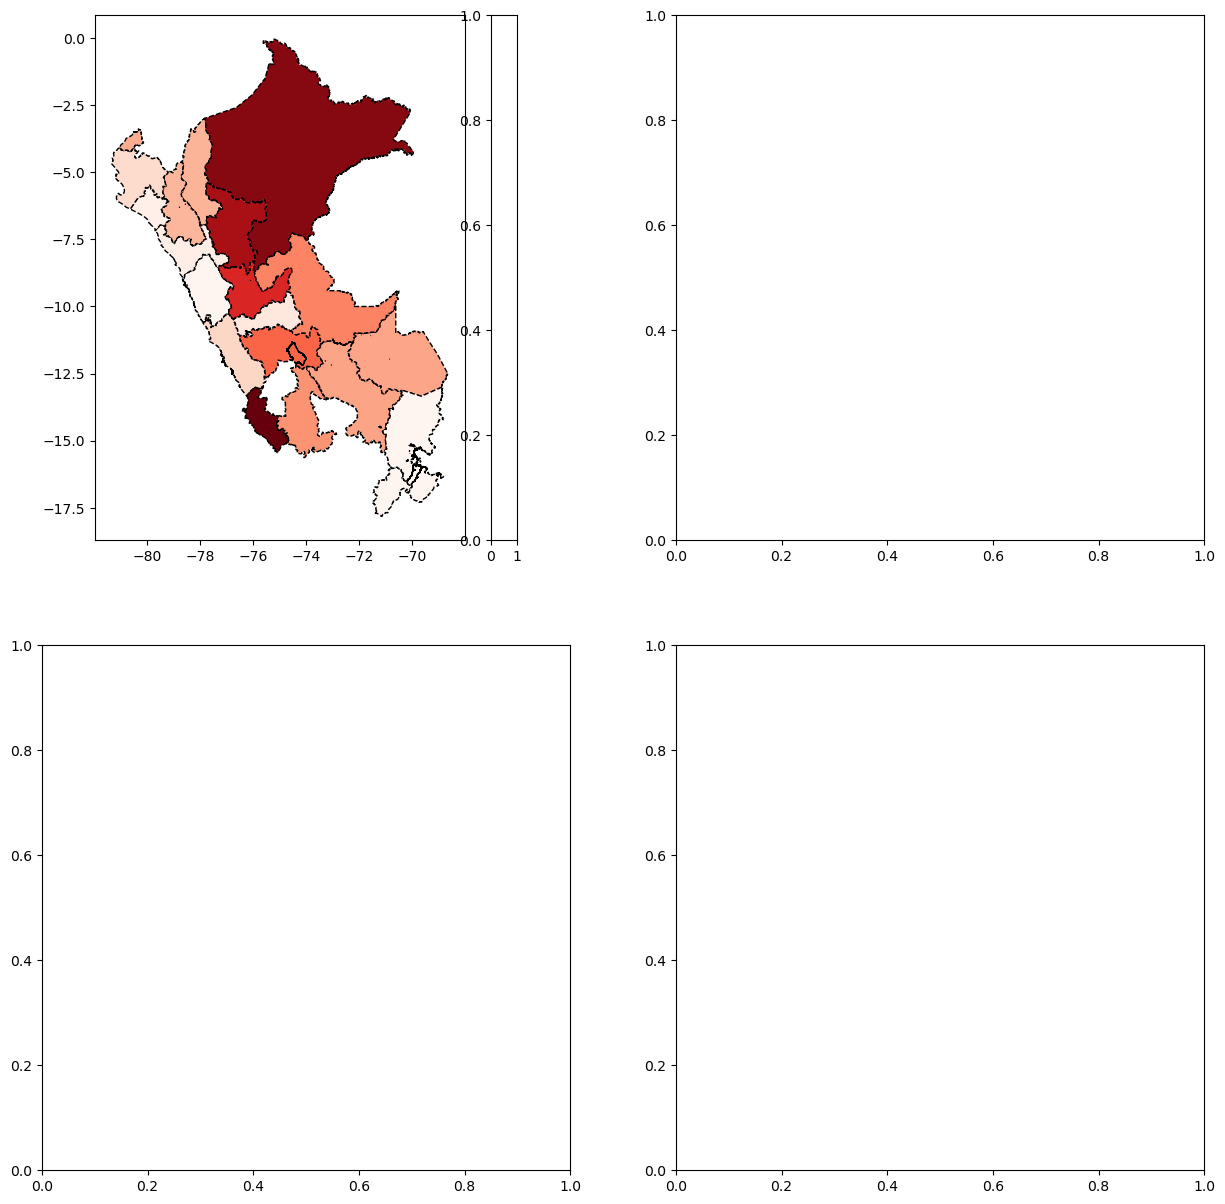

In [300]:
fig, axis = plt.subplots( nrows = 2, ncols= 2, figsize = ( 15, 15 ) )

idx = 0
for i in range(2):
    for j in range (2):
        ax = axis[ i ][ j ]  
        quar=trim[ idx ]
        df6= data_mapa_2021[data_mapa_2021['Trimestre']==quar]
        
        df6.plot(column='Casos',
                 cmap='Reds',
                 linestyle='--',
                 edgecolor='black',
                 legend = True,
                 missing_kwds= dict(color = "#DADADB",),
                 ax=ax,
                 classification_kwds = dict( bins = [ 100, 150, 200, 300,500 ] ),
                 legend_kwds=dict(loc='upper left',
                                  bbox_to_anchor=(1.01, 1),
                                  fontsize='x-large',
                                  title= "Women Proportion",
                                  title_fontsize = 'x-large',
                                  frameon= False )
                )
idx = idx + 1